# Project: The Most Successful Movies Of The Last Six Decades

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Data Contents

The dataset which will be analysed contains information on movies released between 1960 and 2015. Each entry specifies the cast, genre and representative keywords as well as financial information related to the budget and revenue earned. Furthermore there is also data on the popularity of the movie and the number of votes received from viewers.  


### Objectives
The analysis will be done on two directions to reflect the perspective of both viewers and movie producers: <b>ratings</b> and <b>earnings</b>. 
    
#### Ratings
>From a viewer perspective we aim to see the highest rated movies per genre as well as the actors most oftenly playing in critically acclaimed films. Moreover, we will also be looking at the most frequent keywords per decade to get an idea of how the film characteristics have evolved over time. Finally we will be doing a cross reference of the charts based on ratings and earnings to see if the films and actors are common in the two. 

#### Earnings
>The second part of the analysis will be focused on the financial results of the movies in the set. We will start by seeing the charts of the <b>best earners per genre</b>. Next, a breakdown will be done by multiple categories to see what are the <b>characteristics</b> of the most profitable films (e.g. actors, genres). We will close down by looking at the <b>evolution of profits</b> in the industry over time and see which time periods were the most successful in terms of earnings. 

### Libraries and Setup

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import squarify
from collections import Counter
from wordcloud import WordCloud
from decimal import Decimal

%matplotlib inline 
#suppressing the warning in case of false positives
pd.options.mode.chained_assignment = None  
#setting the styles for matplotlib and seaborn and default figure size
mpl.style.use('default')
sns.set(style='white')
#adding the below to make the earnings more readable for large amounts
pd.options.display.float_format = '{0:,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### Objectives:
<ul>
    <li>Check data statistics and integrity</li>
    <li>Remove unneeded data</li>
    <li>Change data types</li>
    <li>Restructure data storing list of items</li>
    <li>Create bins for time periods</li>
    <li>Filter and separate data for analysis of earnings</li>
</ul>

### General Properties

Load the data and check a small sample

In [31]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


Verify the dimensions of the dataframe

In [32]:
df.shape

(10866, 21)

Check some statistics about the columns mostly to see if there are unexpected outliers

In [33]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


Check the datatypes and if there are any null values 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Transformation and Cleanup

Drop columns which will not be used in the analysis

In [35]:
columns_to_drop = ['imdb_id','homepage','tagline','overview']
df.drop(columns_to_drop,axis=1,inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"


Convert the <b>release date</b> to proper format and check it was done

In [36]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

There are several columns with multiple entries for the same row. The analysis will require distinct elements here so they will need to be split. 

But first, null values need to be resolved, otherwise there will be errors when doing the split.  

<b>'None'</b> will be used as placeholder and the value will be filtered out when doing the analysis

In [37]:
na_columns = ['cast','keywords','director','genres','production_companies']
for column_name in na_columns:
    df[column_name].fillna('None',inplace=True)

Now the values can be split to create lists

In [38]:
splittable_columns = ['cast','keywords','genres','production_companies']
for column in splittable_columns:
    df[column] = df[column].str.split('|')

In [39]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,13.11,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41"


Check for <b>duplicates</b>

In [40]:
df[df.duplicated(subset=['original_title','release_date'])].original_title.unique()

array(['TEKKEN'], dtype=object)

Ensure it's a valid duplicate

In [41]:
df[df.original_title == 'TEKKEN']

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.60,30000000,967000,TEKKEN,"[Jon Foo, Kelly Overton, Cary-Hiroyuki Tagawa,...",Dwight H. Little,"[martial arts, dystopia, based on video game, ...",92,"[Crime, Drama, Action, Thriller, Science Fiction]","[Namco, Light Song Films]",2010-03-20,110,5.00,2010,"30,000,000.00","967,000.00"
2090,42194,0.60,30000000,967000,TEKKEN,"[Jon Foo, Kelly Overton, Cary-Hiroyuki Tagawa,...",Dwight H. Little,"[martial arts, dystopia, based on video game, ...",92,"[Crime, Drama, Action, Thriller, Science Fiction]","[Namco, Light Song Films]",2010-03-20,110,5.00,2010,"30,000,000.00","967,000.00"


Drop and recheck

In [42]:
df.drop_duplicates(subset=['original_title','release_date'],inplace=True)
df[df.original_title == 'TEKKEN']

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.60,30000000,967000,TEKKEN,"[Jon Foo, Kelly Overton, Cary-Hiroyuki Tagawa,...",Dwight H. Little,"[martial arts, dystopia, based on video game, ...",92,"[Crime, Drama, Action, Thriller, Science Fiction]","[Namco, Light Song Films]",2010-03-20,110,5.00,2010,"30,000,000.00","967,000.00"


### Create Time Periods

As part of the analysis will be done per time periods, bins will be required in order to categorize the data. 

First step is to create the limits for each decade

In [43]:
edges = list(range(1959,2029,10))
edges

[1959, 1969, 1979, 1989, 1999, 2009, 2019]

Create the list of categorical values which will be used 

In [44]:
bin_names = ['60s','70s','80s','90s','2000s','2010s']

Insert the bins and check a sample 

In [45]:
df['time_period'] = pd.cut(df['release_year'], edges, labels=bin_names)
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,time_period
0,135397,32.99,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",2010s
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49",2010s
2,262500,13.11,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41",2010s


### Financial Data Preparation

As part of the analysis will require aggregation of some values, we need to ensure to remove entries where either financial data or ratings are not present. 

First let's see how many rows are missing each type of data. 

In [46]:
df.query('budget==0 or revenue==0')['id'].count()

7011

In [47]:
df.query('vote_average==0')['id'].count()

0

Since there is a significant number of entries missing budget/revenue information, a new smaller dataframe will be created and used for this part of the analysis. 

In [48]:
df_fin = df.query('budget>0 and revenue>1')

In [49]:
df_fin.shape

(3854, 18)

Add 2 new columns to store the profit in absolute amount and profit ratio

In [50]:
df_fin.loc[:,'profit'] = df_fin['revenue_adj'] - df_fin['budget_adj']  
df_fin.loc[:,'profit_ratio'] = df_fin['revenue_adj'].div(df_fin['budget_adj'])  - 1
df_fin.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,time_period,profit,profit_ratio
0,135397,32.99,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",2010s,"1,254,445,953.24",9.09
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49",2010s,"210,161,353.21",1.52
2,262500,13.11,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41",2010s,"170,419,069.94",1.68


Taking a look at the stats, we can notice there is something wrong with some of the profit ratios (the max value and standard deviation support this conclusion).

In [51]:
df_fin.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_ratio
count,"3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00"
mean,"39,888.19",1.19,"37,203,696.95","107,686,616.10",109.22,527.72,6.17,"2,001.26","44,239,993.08","137,064,690.30","92,824,697.22",297.04
std,"67,222.53",1.48,"42,208,224.69","176,539,346.11",19.92,879.96,0.79,11.28,"44,809,254.03","216,111,351.44","194,071,459.74","16,442.56"
min,5.00,0.00,1.00,2.00,15.00,10.00,2.20,"1,960.00",0.97,2.37,"-413,912,431.00",-1.00
25%,"6,073.50",0.46,"10,000,000.00","13,600,032.25",95.00,71.00,5.70,"1,995.00","13,090,528.47","18,357,350.36","-1,504,994.63",-0.12
50%,"11,321.50",0.80,"24,000,000.00","44,800,002.50",106.00,204.00,6.20,"2,004.00","30,016,111.91","61,730,679.08","27,370,641.16",1.12
75%,"38,573.25",1.37,"50,000,000.00","124,212,540.75",119.00,580.00,6.70,"2,010.00","60,613,069.68","163,257,654.56","107,454,751.41",3.21
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41","2,750,136,650.92","1,018,618.28"


Looking in more detail we can see that there are 4 movies with a budget of less than 250$, which is clearly wrong, and
2 movies with correct data, but off the charts profitability: Paranormal Activity and Blairwitch Project

In [52]:
df_fin[df_fin['profit_ratio']>1000]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,time_period,profit,profit_ratio
2449,2667,0.93,25000,248000000,The Blair Witch Project,"[Heather Donahue, Michael C. Williams, Joshua ...",Daniel Myrick|Eduardo SÃ¡nchez,"[witch, voodoo, legend, sorcery, maryland]",81,"[Horror, Mystery]","[Artisan Entertainment, Haxan Films]",1999-07-14,522,6.30,1999,"32,726.32","324,645,105.96",90s,"324,612,379.63","9,919.00"
3581,59296,0.52,1,1378,"Love, Wedding, Marriage","[Mandy Moore, Kellan Lutz, Jessica Szohr, Autu...",Dermot Mulroney,"[wedding vows, marriage, love]",90,"[Comedy, Romance]","[120dB Films, Scion Films, Voodoo Production S...",2011-06-03,55,5.30,2011,0.97,"1,335.83",2010s,"1,334.86","1,377.00"
3608,50217,0.46,93,2500000,From Prada to Nada,"[Camilla Belle, Alexa PenaVega, April Bowlby, ...",Angel Gracia,"[tattoo, cooking, bankrupt, sacrifice, latina]",107,"[Comedy, Drama, Romance]","[Lewis Gilbert Productions, Lionsgate, Modern ...",2011-01-28,47,5.20,2011,90.15,"2,423,495.11",2010s,"2,423,404.95","26,880.72"
6179,11338,0.13,114,6700000,Into the Night,"[Jeff Goldblum, Michelle Pfeiffer, Stacey Pick...",John Landis,"[adultery, assassin, airport, daily life, chase]",115,"[Comedy, Drama, Thriller]",[Universal Pictures],1985-02-15,24,6.10,1985,231.10,"13,582,012.55",80s,"13,581,781.45","58,770.93"
7447,23827,1.12,15000,193355800,Paranormal Activity,"[Katie Featherston, Micah Sloat, Mark Fredrich...",Oren Peli,"[haunting, psychic, entity, demonic possession...",86,"[Horror, Mystery]","[Blumhouse Productions, Solana Films]",2007-09-14,714,6.10,2007,"15,775.03","203,346,220.13",2000s,"203,330,445.10","12,889.39"
10495,8856,0.77,113,115103979,"The Karate Kid, Part II","[Ralph Macchio, Pat Morita, Martin Kove, Charl...",John G. Avildsen,"[martial arts, karate, okinawa, revanche, self...",113,"[Adventure, Drama, Action, Romance, Family]","[Columbia Pictures Corporation, Delphi V Produ...",1986-06-18,211,5.80,1986,224.80,"228,988,593.74",80s,"228,988,368.94","1,018,618.28"


For the sake of profitability graphs, the 4 movies with incorrect data will be excluded whereas the remaining two will be adjusted. 

In [53]:
df_fin = df_fin[df_fin['budget_adj']>250]
df_fin.loc[df_fin[df_fin['profit_ratio']>1000].index,'profit_ratio']=1000

<a id='eda'></a>
# Exploratory Data Analysis

## Quick Stats

Before getting started let's get some quick facts to warm up.

###### Who were the top 10 directors based on the number of movies

In [54]:
#Excluding the placeholders for null values
df[df['director']!='None']['director'].value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

###### Trivia
Woody Allen has won over his career 5 Oscars, has 24 Oscar nominations and was also awarded the Cecil B. Demille Award for lifetime achievement

##### What are the top 10 best rated movies overall 

In [55]:
#sorting descending, resetting the index as we are not interested in that and selecting only the columns we need
df.sort_values('vote_average',ascending=False).reset_index(drop=True).loc[:,['original_title','vote_average']].head(10)

,original_title,vote_average
0,The Story of Film: An Odyssey,9.20
1,The Mask You Live In,8.90
2,Black Mirror: White Christmas,8.80
3,Life Cycles,8.80
4,Pink Floyd: Pulse,8.70
5,Opeth: In Live Concert At The Royal Albert Hall,8.60
6,The Art of Flight,8.50
7,Queen - Rock Montreal,8.50
8,A Personal Journey with Martin Scorsese Throug...,8.50
9,Dave Chappelle: Killin' Them Softly,8.50


###### Trivia
White Christmas contains references to all the previous six episodes of Black Mirror. 

###### What are the biggest earners of all time 

In [56]:
df.sort_values('revenue_adj',ascending=False).reset_index(drop=True).loc[:,['original_title','revenue_adj']].head(10)

,original_title,revenue_adj
0,Avatar,"2,827,123,750.41"
1,Star Wars,"2,789,712,242.28"
2,Titanic,"2,506,405,735.42"
3,The Exorcist,"2,167,324,901.20"
4,Jaws,"1,907,005,841.92"
5,Star Wars: The Force Awakens,"1,902,723,129.80"
6,E.T. the Extra-Terrestrial,"1,791,694,309.25"
7,The Net,"1,583,049,536.35"
8,One Hundred and One Dalmatians,"1,574,814,739.70"
9,The Avengers,"1,443,191,435.21"


###### Trivia
Gone with the Wind (released in 1939) has been the top grossing film for twenty-five years and it is believed that based on inflation adjusted amounts it is still no.1 today. 

## Rating Analysis

### Objectives
<ul>
    <li>Highest rated movies per genre</li>
    <li>Actors starring in movies with high ratings</li>
    <li>Evolution of most common keywords by decade</li>
</ul>

### Highest Rated Movies

First we will go deeper with the analysis for best rated movies and check out the winners per genre.
To get started with this, first create a list of the most popular genres and then create the graphs for each genre. 

#### Helper methods 

In [57]:
#Main method used to build the barcharts for analysis based on the movie genre

def build_genre_chart(data, #input dataframe
                      title,#chart title
                      chart_size,#number of movies to be displayed
                      sort_by, #classification criteria
                      limit_name, #criteria used to filter our unrepresentative records
                      limit_value,
                      show_values #option to display or not the values on the chart
                     ):
    
    #select top criteria elements
    flatten_list_keys, flatten_list_values = get_top_list(data,'genres',chart_size)
    
    #filter out based on limit
    df_temp = data[data[limit_name]>limit_value]
    
    #build figure
    fig, axes = get_figure(5,2,18,12,title,1.4,0.5)
    
    #build chart
    build_figure(df_temp,fig,axes,flatten_list_keys,'genres',sort_by,10,'original_title',"YlGnBu_r",show_values)

In [58]:
#Method used to retrieve single list of most common elements from list of lists and the value count 
def get_top_list(data, #input dataframe
                 column, #column to be flatten and counted
                 limit #number of top elements to return
                ):
    #flatten list of lists
    flat_list = [x for l in data[column] for x in l]
    flat_list = list(filter(lambda x: x!='None',flat_list))
    
    #Count the values and filter based on limit
    top_dictionary = dict(Counter(flat_list).most_common(limit))
    
    #Return the list
    return list(top_dictionary.keys()),list(top_dictionary.values())

In [59]:
#Method used to retrieve the figure and axes objects based on input dimensions
def get_figure (nrows,
                ncols,
                height,
                widith,
                title,
                wspace,
                hspace):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_figheight(height)
    fig.set_figwidth(widith)
    fig.tight_layout()
    fig.suptitle(title,va='top') 
    fig.subplots_adjust(top=0.90) #extra step needed to ensure the suptitle does not overlap with the subplots titles
    fig.subplots_adjust(wspace=wspace,hspace=hspace)
    
    return fig, axes

In [60]:
#Method used to add the values directly next to the barchart elements for easier interpretation
def show_row_value(ax,
                   data,
                   column,
                   formatter_string,
                   size):
    #account for different types of data which might need to be formatted 
    if ('ratio' in column):
        formatter_string = '{0:,.2f}%'
    elif (('revenue' in column) | ('profit' in column)):
        formatter_string = '{0:,.2f}B$'
        data[column] = data[column] / 1000000000
    #ensure the values are aligned to the x coordinate of the top one
    text_start = data.iloc[0][column]
    for i,v in enumerate(data[column].head(size)):
        ax.text(text_start+0.3, i+.25, str(formatter_string.format(v)), color='black')
    return ax

In [61]:
#Method used to build the actual barchart 
def build_figure (data, #input dataframe
                  fig, #figure and axes objects
                  axes,
                 flatten_list, #list of most common elements
                 split_criteria, #criteria based on which the data is split into subplots
                 sort_criteria, #criteria used to arrange the subplot data
                 chart_size, #number of records to show in the chart
                 chart_y_variable, #column data used for Y axis labels
                 palette, 
                 show_values):
    #iterate over axes and criteria elements
    for ax, flatten_criteria in zip(axes.flatten(), flatten_list):
        #Filter only rows that contain the selected genre, order by vote average and move to distinct dataframe
        df_chart = data[data[split_criteria].apply(lambda x: flatten_criteria in x)]               
        df_chart=df_chart.sort_values(sort_criteria,ascending = False)
        #Add the labels with the values since the differences are small
        if(show_values):
            ax = show_row_value(ax,df_chart,sort_criteria,'{0:,.2f}',10)
        sns.barplot(x=list(df_chart[sort_criteria].head(10)),y=list(df_chart[chart_y_variable].head(10)), ax = ax,palette=palette);
        ax.set(title = flatten_criteria.upper(), xlabel = sort_criteria.title())
        #Remove unneeded elements from the graph
        sns.despine(fig,ax=ax,bottom=True,left=True)
        ax.xaxis.set_major_formatter(plt.NullFormatter())

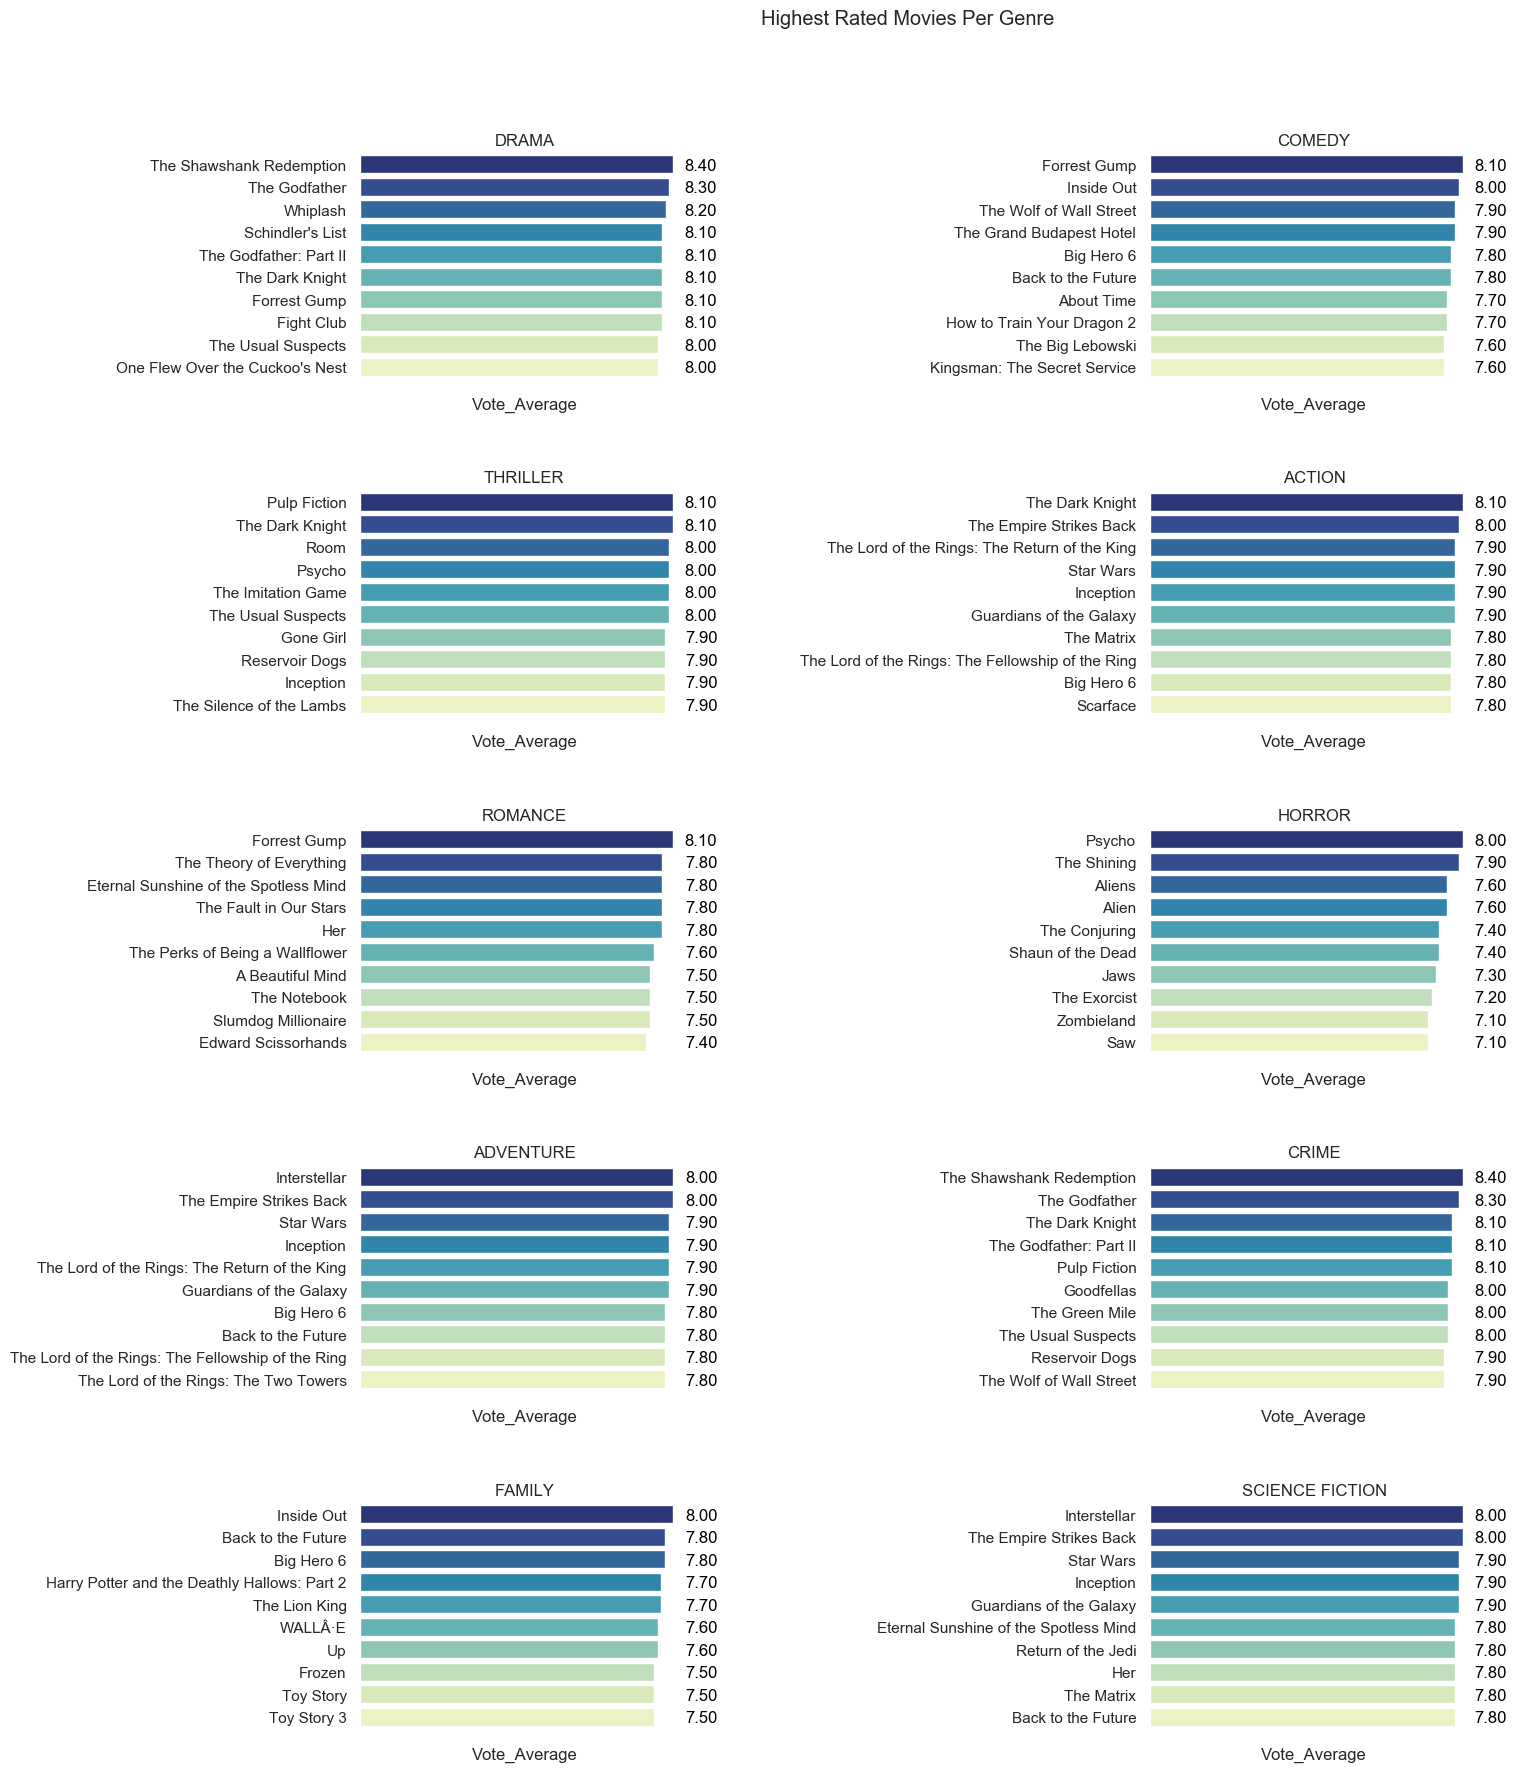

In [62]:
build_genre_chart(df,'Highest Rated Movies Per Genre',10,'vote_average','vote_count',1000,True)

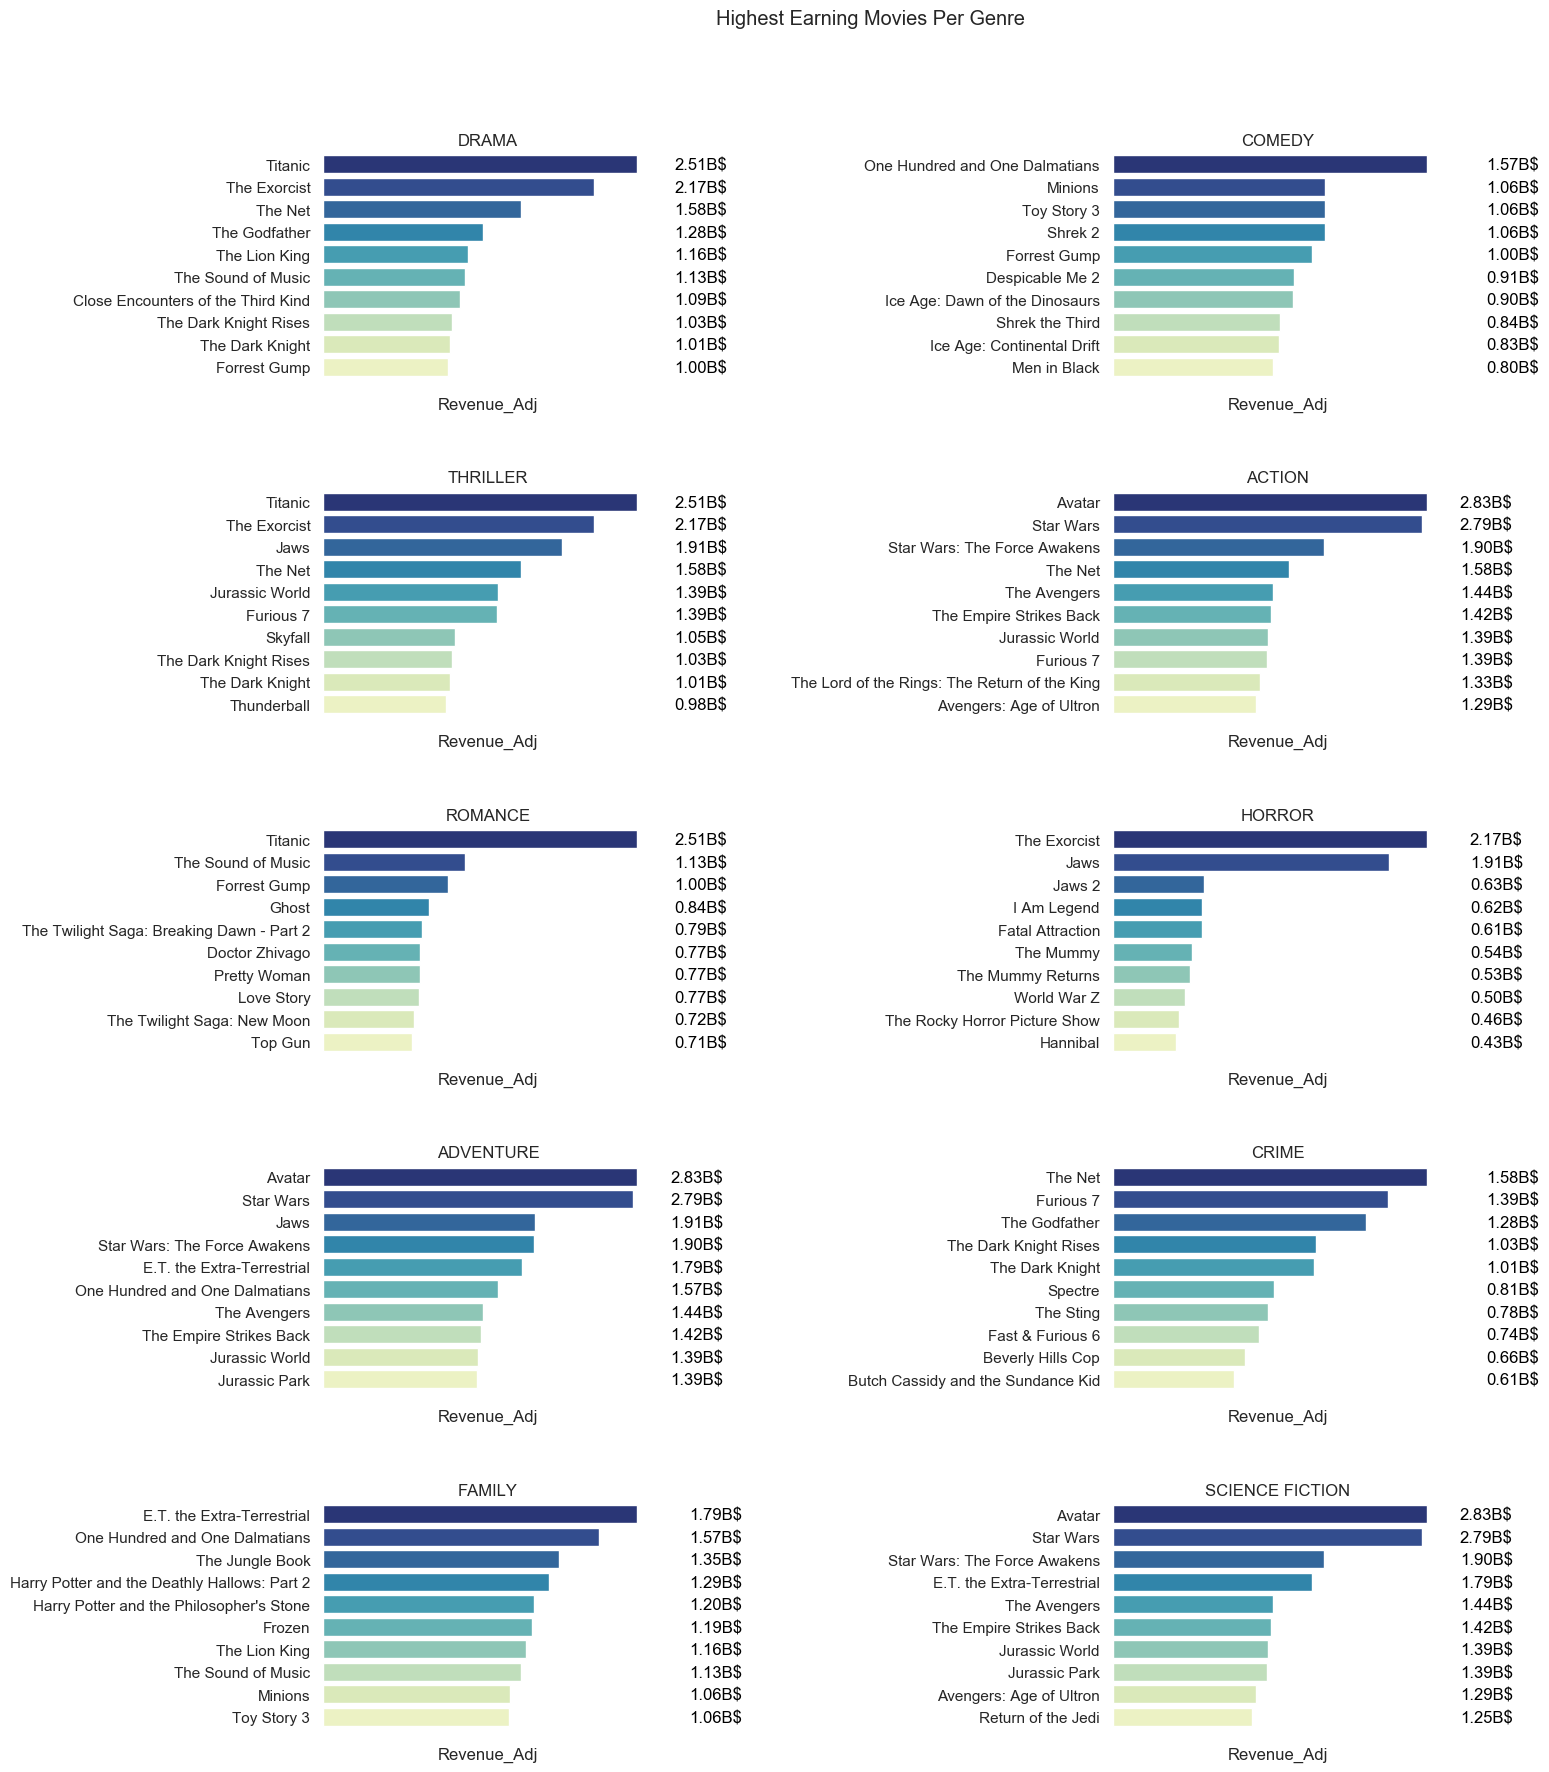

In [63]:
build_genre_chart(df,'Highest Earning Movies Per Genre',10,'revenue_adj','revenue_adj',10000000,True)

As we are interested to see if the high ratings are correlated with similar earnings, next we will be plotting the breakdown per genre but based on revenues this time. 

Overall the results are quite different when looking at the two criteria. 

Movies with high ratings such as: <b>Shawshank Redemption, Schindler’s List, Fight Club, Alien or Eternal Sunshine of a Spotless Mind</b> are out of the charts for best earners. 

On the other side, we can see titles such as <b>the Twilight Saga, Avatar, or the Mummy</b> that are not characterized by high ratings despite good financial results. 

Some notable exceptions to the above rule are movies such as: <b>Forrest Gump, The Godfather, Jaws or Lord of the Rings</b> which have been a success both critically and financially. 


###### Trivia 
The Shawshank Redemption which is the overall leader in the ratings on IMDb made only  18 million USD at the box office. As it became more and more popular over time it went on to earn more than 80 million USD from video-rentals. It has also no Oscars, despite being nominated. 

### Actors

Next objective is to see what actors have on average the highest ratings for their movies.
The logic here will be to get a list of actors, their number of movies and the average rating for all their movies. 

Similar to the comparison done for the movies we will also be cross referencing this list with a second chart of actors playing in high earning movies. It will be interesting to see the differences. 


First step is to build a new dataframe aggregating the data for each actor: number of movies, average rating, total earnings.

In [64]:
#Flatten the list of lists and keep duplicates
actors = [x for l in df['cast'] for x in l]
#Use the counter to get the number of movies and transform it into a dictionary and then a dataframe
actors_df = pd.DataFrame.from_dict(dict(Counter(actors)),orient='index',columns=['movies'])
#Filter our actors with 10 or less movies are we are interested in consistent performances not one offs
actors_df = actors_df[(actors_df['movies']>10)]
#Filter out the placeholder for null values
actors_df.drop(['None'],inplace=True)
#Reset the index because we do not want the actor name to be the index and rename the column properly
actors_df.reset_index(inplace=True)
actors_df.rename(columns={'index':'actor'},inplace=True)
#Finally, add and fill in the columns for the average rating and total revenue and check out the results
actors_df['rating'] = 0
actors_df['revenue'] = 0

for actor in actors_df['actor']:
    data = df[df['cast'].apply(lambda x: actor in x)][['vote_average','revenue_adj']]
    mean = round(data.mean()['vote_average'],2)
    earn = round(data.sum()['revenue_adj'],2)
    index = actors_df.index[actors_df['actor']==actor]
    actors_df.iloc[index,2] = mean    
    actors_df.iloc[index,3] = earn 
actors_df.head(3)

,actor,movies,rating,revenue
0,Vincent D'Onofrio,24,6.24,"2,743,203,962.82"
1,Tom Hardy,21,6.64,"2,854,136,117.60"
2,Charlize Theron,31,6.15,"2,849,954,806.33"


Having the data prepared it's time to see the top 20 side by side.  

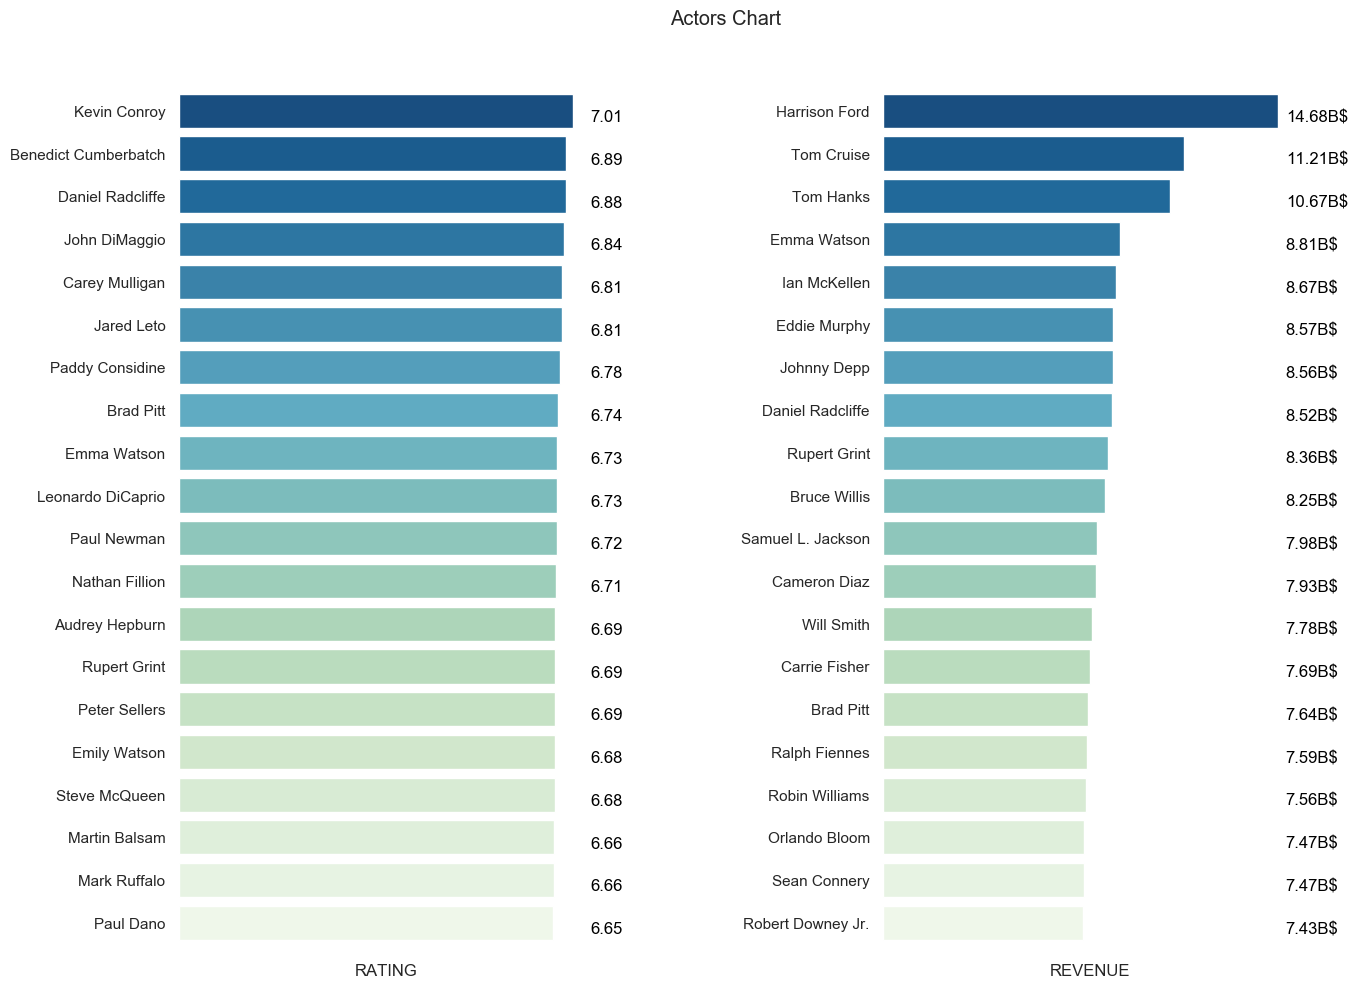

In [66]:
fig, axes = get_figure(1,2,10,12,'Actors Chart',0.7,0.0)
#Remove actors with less than 10 movies in the database to keep representative entries
temp_df = actors_df[actors_df['movies']>10]
categories = ['rating','revenue']
for ax, category in zip(axes.flatten(), categories):
    top_df = temp_df.sort_values(category,ascending=False)[['actor',category]].head(20)
    ax.set_xlabel(category.upper())
    sns.despine(fig,ax=ax,bottom=True,left=True)
    ax = show_row_value(ax,top_df,category,'{0:,.2f}',20)
    sns.barplot(y=list(top_df['actor']),x=list(top_df[category]),ax=ax,palette="GnBu_r");
    ax.xaxis.set_major_formatter(plt.NullFormatter())

As observed, the difference is even more striking than with movie titles. 

Some of the few common names are <b>Brad Pitt</b> and the actors from the Harry Potter movies: <b>Emma Watson, Rupert Grint and Daniel Radcliffe</b>. 

###### Trivia
Kevin Conroy is the voice of Batman in the animated series from the 90s and 8 more Batman animated series, 12 animated movies and 7 video games. He is without a doubt the actor who played Batman the most. 

## Most Representative Keywords Per Decade

In order to get the most frequent keywords, the list of lists will be flattened for each decade. 
The results will be stored in a list as we are interested in keeping duplicate values. 

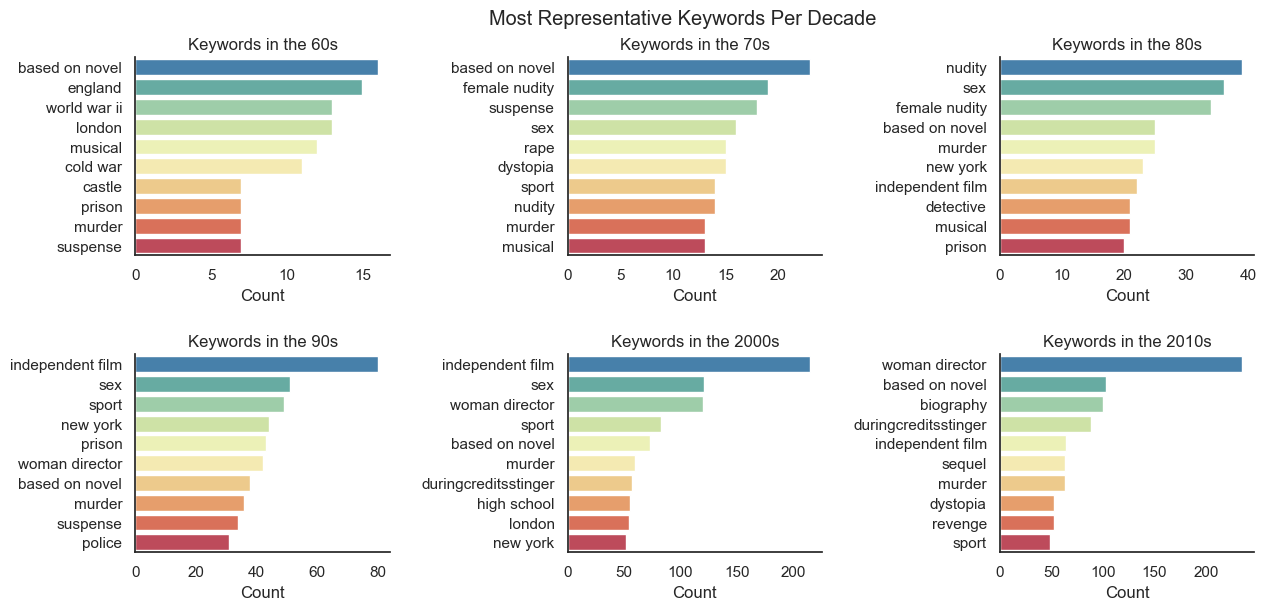

In [67]:
fig, axes = get_figure(2,3,6,12,'Most Representative Keywords Per Decade',0.7,0.5)
#iterate over axes and decade 
for ax, decade in zip(axes.flatten(), bin_names):
    df_temp = df[df['time_period']==decade]
    keys,values = get_top_list(df_temp,'keywords',10)
    ax.set_title('Keywords in the '+decade)
    ax.set_xlabel('Count')
    sns.barplot(x=values,y=keys, ax = ax,palette="Spectral_r");
    sns.despine(fig,ax=ax)

Looking at the results there are some interesting facts to observe. 
In the 60s the WW2 and Cold War themes appear often, reflecting the realities of those times. 
Moving over to the other end, over the last years, sequels are an often appearance, indicating maybe a lack of new ideas and a tendency to recycle old working models. Biography is also a more common topic over the last decade. 

Some themes appear constantly in the top 10 over all decades, albeit in different positions: sports, murder/police stories and sex. 

Looking at the charts we could also conclude that the 90s and 2000s have known a spike of independent movies. 

###### Trivia
Shawshank Redemption, the top rated title, is based on a novel from Stephen King released in 1982 and titled: Rita Hayworth and Shawshank Redemption. 

# Profitability Analysis 

## Top Movies

### Objectives
<ul>
    <li>Movies with highest return on investment</li>
    <li>Movies with highest profit</li>
    <li>Highest earnings</li>
    <li>Genre distribution of profitable movies</li>
    <li>Production companies with most profitable movies</li>
    <li>Keywords distribution of profitable movies</li>
    <li>Actors playing in most profitable movies</li>
    <li>Budget/revenue evolution across the timeline</li>
</ul>

### Highest Return on Investment Per Decade

In this first category we will be looking at movies with high ratio of returns on investment. As it will be observed those are not necessarily the highest earners with billion dollar profits, but rather movies with small production budgets that went out to be box office hits. 

#### Helper Method

In [68]:
#Method used to build a barchart for distributing results over decade 
def build_decade_barchart(fig,
                         axes,
                         data,
                         sort_by,
                         limit,
                         y_axis_element,
                         x_axis_label,
                         palette):
    for ax, decade in zip(axes.flatten(), bin_names):
        temp_df = data[data['time_period'] == decade].sort_values(sort_by,ascending=False).head(limit)
        ax = show_row_value(ax,temp_df,sort_by,'{0:,.2f}',10)
        sns.barplot(x=list(temp_df[sort_by]),y=list(temp_df[y_axis_element]), ax = ax,palette=palette);
        sns.despine(fig,ax=ax,bottom=True,left=True)
        ax.set(title = decade.upper(), xlabel = x_axis_label)
        ax.xaxis.set_major_formatter(plt.NullFormatter())

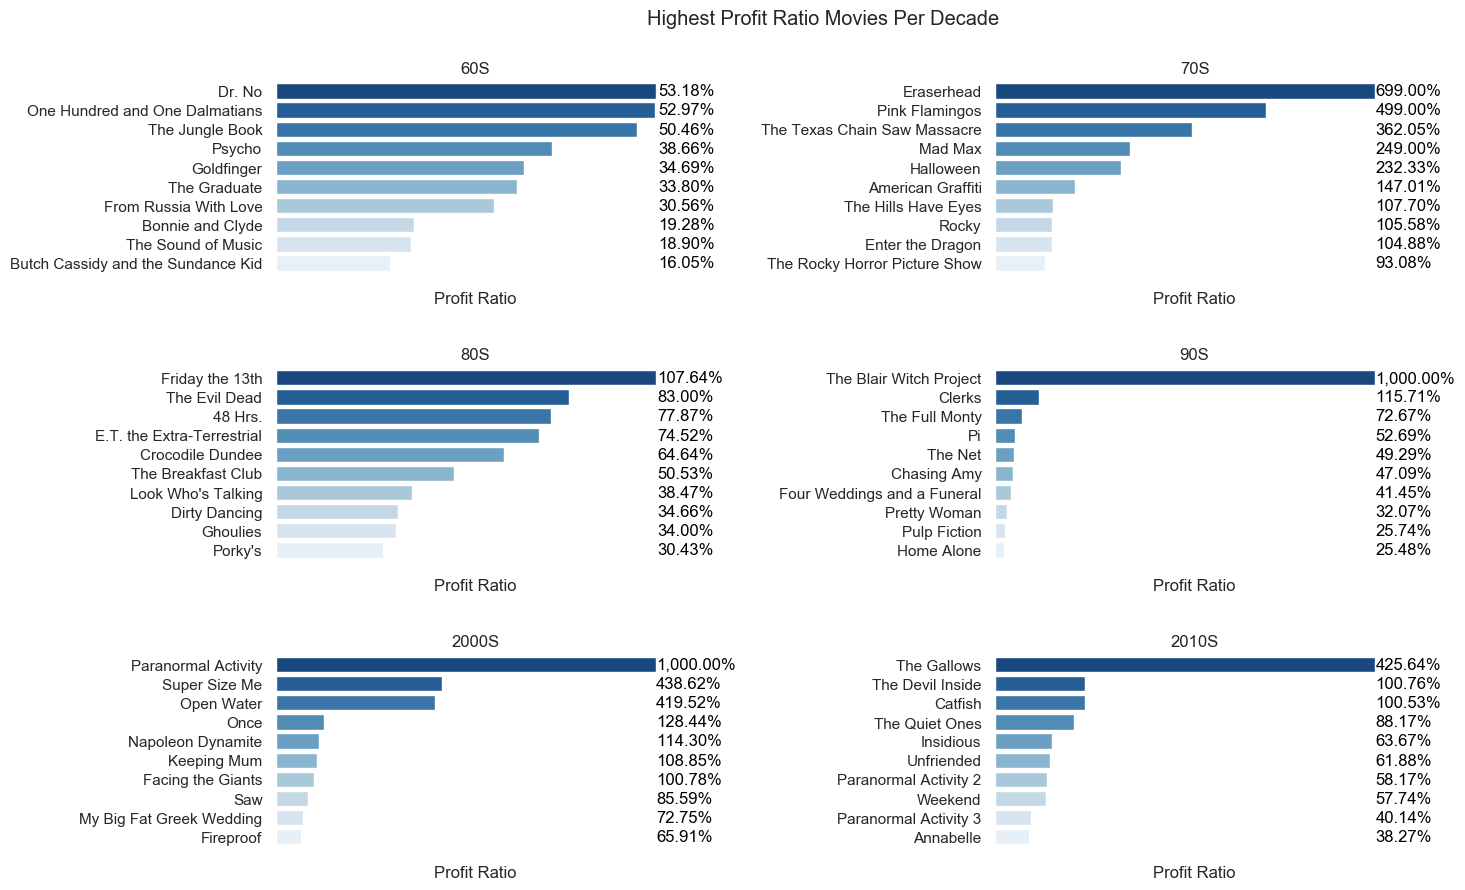

In [69]:
#Dataframe is filtered based on time period, and the result is ordered based on the measure we need 
fig, axes = get_figure(3,2,9,12,'Highest Profit Ratio Movies Per Decade',0.8,0.5)
build_decade_barchart(fig,axes,df_fin,'profit_ratio',10,'original_title','Profit Ratio',"Blues_r")

As it can be observed, horror movies lead the way in terms of profit ratios. With the exception of the 60s, all other decades are dominated by films from this genre.

Some of the examples are remarcable through the differences between the budget and the earnings. 

<b>The Blair Witch Project</b> had a budget of 60.000 USD and went out to earn around 248 millions USD worldwide. 

Next on, <b>Paranormal activity</b> sets the bar even lower in terms of budget with 15.000 USD and records earnings of more than 193 million USD. 

<b>The Gallows</b> is the latest example in this trend. While not on the same magnitude as the previous two, it still earned 43 million USD from a budget of only 100.000 USD. 

### Highest Profit Per Decade

In the following section we will be looking at actual profit amounts and get a list of the highest placed films per decade. 

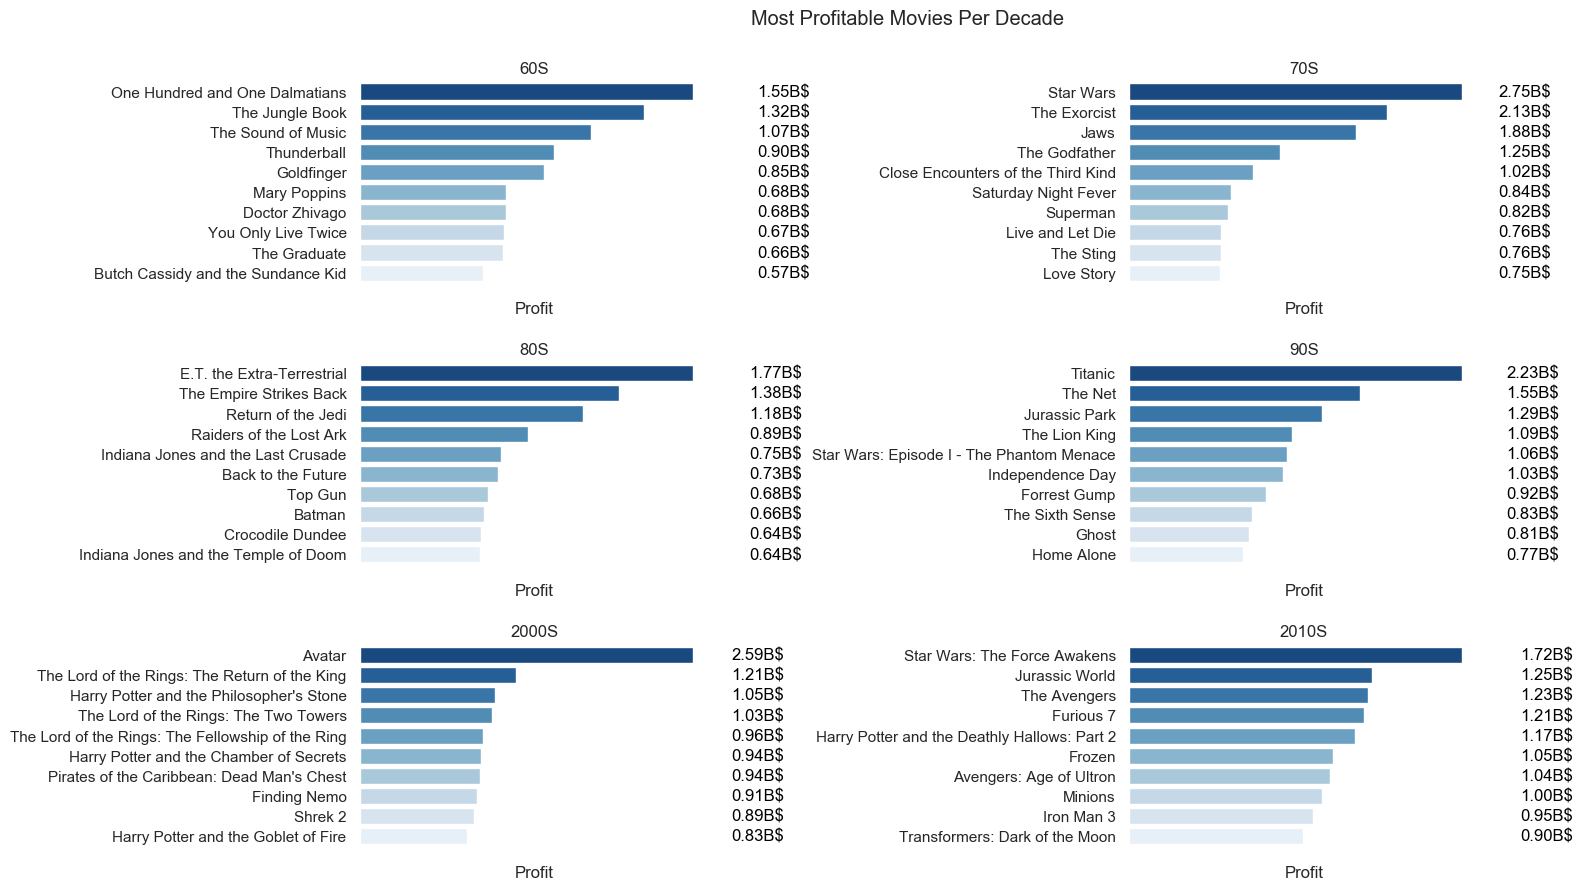

In [70]:
# Same logic is applied as before but a different measure is selected to sort by
fig, axes = get_figure(3,2,9,12,'Most Profitable Movies Per Decade',1.2,0.4)
build_decade_barchart(fig,axes,df_fin,'profit',10,'original_title','Profit',"Blues_r")

First thing that can be observerd when looking at the top 10s based on profit amount is that none of the films from the previous charts (based on profit ratio) are present. There are clear winners for the past 4 decades, all of them having a profit of over 1.5 billion USD. 

The highest all time value is recorded by Avatar that starting from a budget of 425 million USD went on to earn more than 2.7 billion USD worldwide. 

### Movies With Highest Earnings Per Decade

Similar to the previous section we will be looking here are high earning movies but in this case the budget will be removed from the analysis. Still, we expect that most of the results will be inline with the previous chart. 

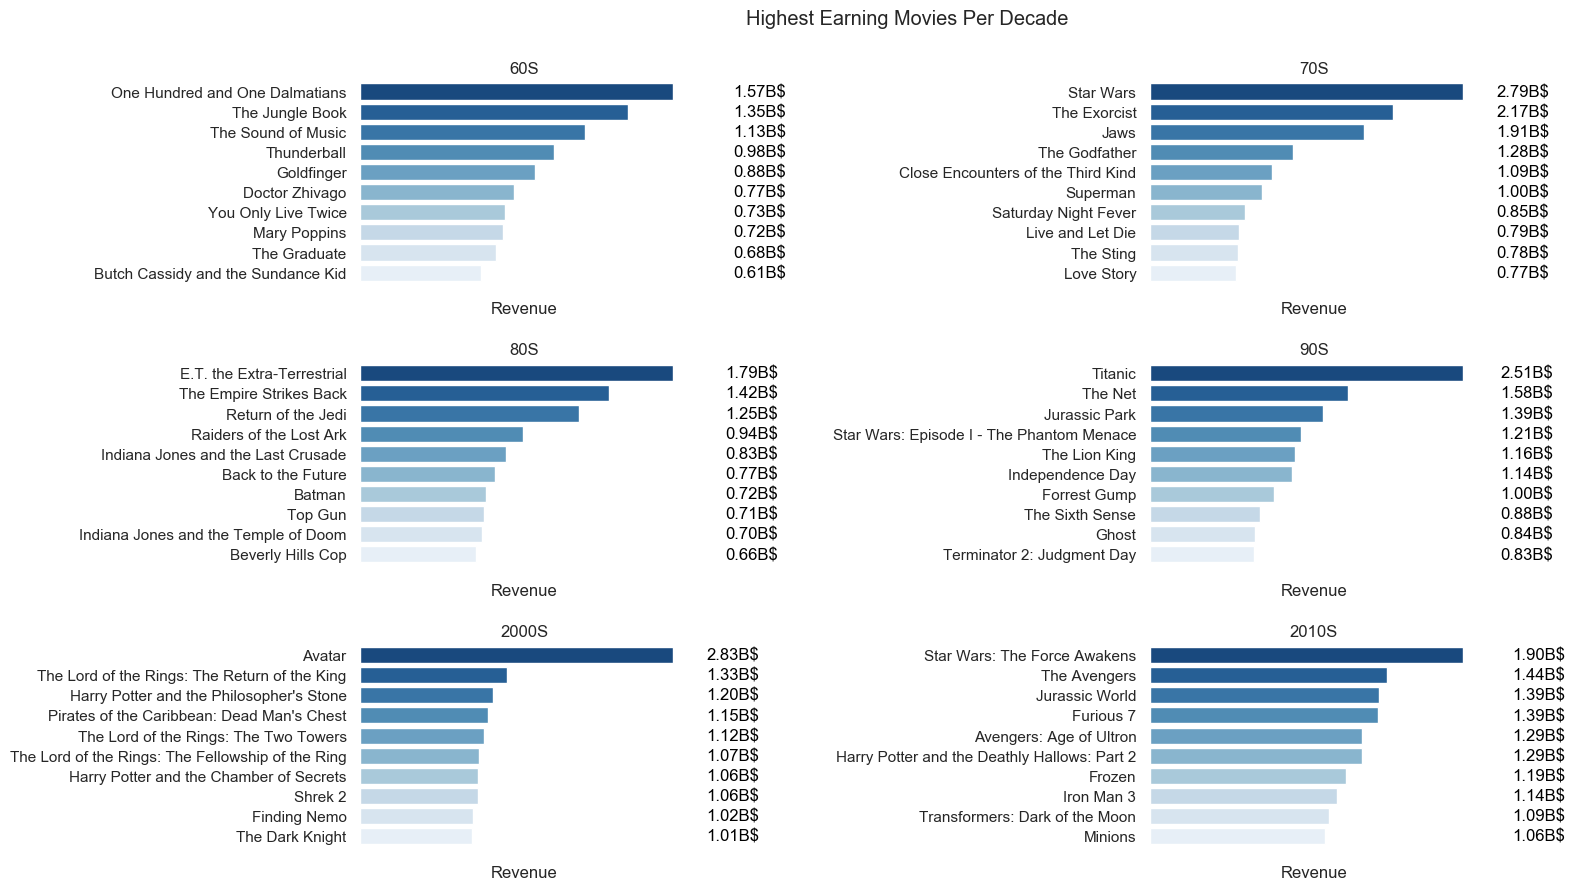

In [71]:
fig, axes = get_figure(3,2,9,12,'Highest Earning Movies Per Decade',1.4,0.4)
build_decade_barchart(fig,axes,df_fin,'revenue_adj',10,'original_title','Revenue',"Blues_r")

As expected in most cases the top 10 contains the same movies with minor changes in the positions. 

The only differences are in th 80s where <b>Crocodile Dundee</b> makes it's way in the top 10 based on profit but is repleaced by <b>Beverly Hills Cop</b> in terms of revenue. Similar situation is recorded in the 2000s where <b>The Dark Knight</b> makes the top in terms of revenue but it's surpassed by <b>Harry Potter and the Goblet of Fire</b> when taking into account the production costs as well. 

###### Trivia
Although not the first in terms of the all time earnings, Star Wars: TFA and Jurassic World are the movies which passed the 1 billion USD mark the fastest, in just 12 days. The all time fastest movie to go beyond 1 billion is Avengers Infinity War, with 
11 days. 

## Characteristics of Success

The aim of the following sections will be to get a view of the common characteristics of the movies that fall in the upper range of profitability. The charts will be based on a count of profitable movies and not on the sum of their total earnings.Therefore we will be interested more in the ordering and less in the absolute amounts. The graphs will reflect this as we will be using tree maps and wordclouds to represent the results in some instances. 

#### Profit lower bound

In order to make an analysis of the characteristics of profitable movies, first we need to define the boundaries for the sample we are going to use. This will be the average for proft ratio and absolute amount. Only the movies in the upper range will be counted. 
As observed below, a rate of at least 11,6% and profit amount of at least 27M $ will be the starting point.
The analysis is done in terms of both ratio and absolute amount. This way we could also take into account low budget independent movies which turned out to be very profitable. 

In [72]:
#Define lower bounds of profit 
profit_limit = df_fin.describe().profit_ratio['50%']
print(round(profit_limit,2))
profit_limit_abs = df_fin.describe().profit['50%']
print(round(profit_limit_abs,2))
categories = ['profit_ratio','profit']
limits = [profit_limit,profit_limit_abs]

1.12
27884273.95


### Genre Distribution

We will check what are the most common genres in profitable movies
The graphs for profit ratio and absolute amount will be side by side for better comparison. 
Since we are interested more in the order of the genres and the magnitude of the difference between them, we will be using a treemap to visualise the results. 

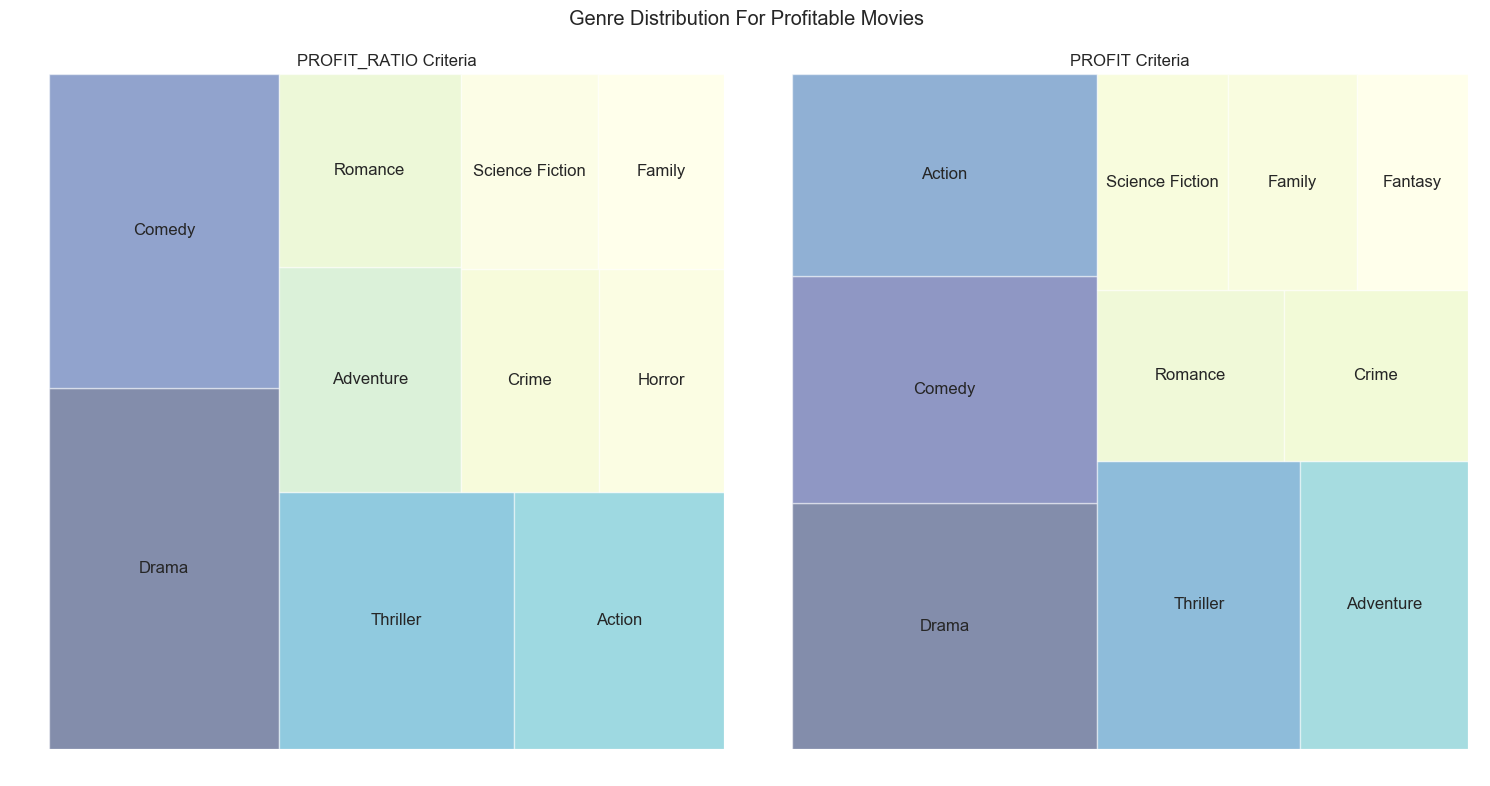

In [73]:
fig, axes = get_figure(1,2,8,15,'Genre Distribution For Profitable Movies',0.1,0.4)
for ax,category,limit in zip(axes,categories,limits):
    df_temp = df_fin[df_fin[category]>limit]
    keys,values = get_top_list(df_temp,'genres',10)
    cmap = mpl.cm.YlGnBu
    norm = mpl.colors.Normalize(vmin = min(values), vmax = max(values))
    colors = [cmap(norm(value)) for value in values]
    #Plot the treemaps using squarify
    squarify.plot(sizes=values,label=keys, ax = ax,alpha=.5, color=colors);
    ax.set(title = (category.upper()+" Criteria"))
    #Remove the axis as they are not fit for this type of graph
    ax.axis('off')

We can see that on average, drama movies tend to fall in the upper profitablity ranges. This is interesting to observe, considering the top 10 highest earners are mostly action/adventure movies or science fiction titles. Comedies are also good earners on average. This could potentially also be explained by the relatively low costs of producing dramas or comedies compared to the action/adventure counterparts. 

Good to note that in terms of profit ratios, horror movies also come into the top 10 which doesn't happen when looking at the absolute amounts. This reflects the presence of independent horror movies with low budget and high earnings. 

###### Trivia
One of the biggest dissapointments in terms of earnings is 2006s All the King's Men. Although having cast which included the likes of Anthony Hopkins, Sean Penn or Jude Law, the movie which cost about 55 million USD to produce, earned just shy of 9 million USD. 

### Production Companies With Most Profitable Movies

For the analysis on production companies we will try to change the logic in order to remove a potential bias coming from the number of movies released. So we will count not only the high performing movies but include information of the total number of movies in the portfolio of each company. 

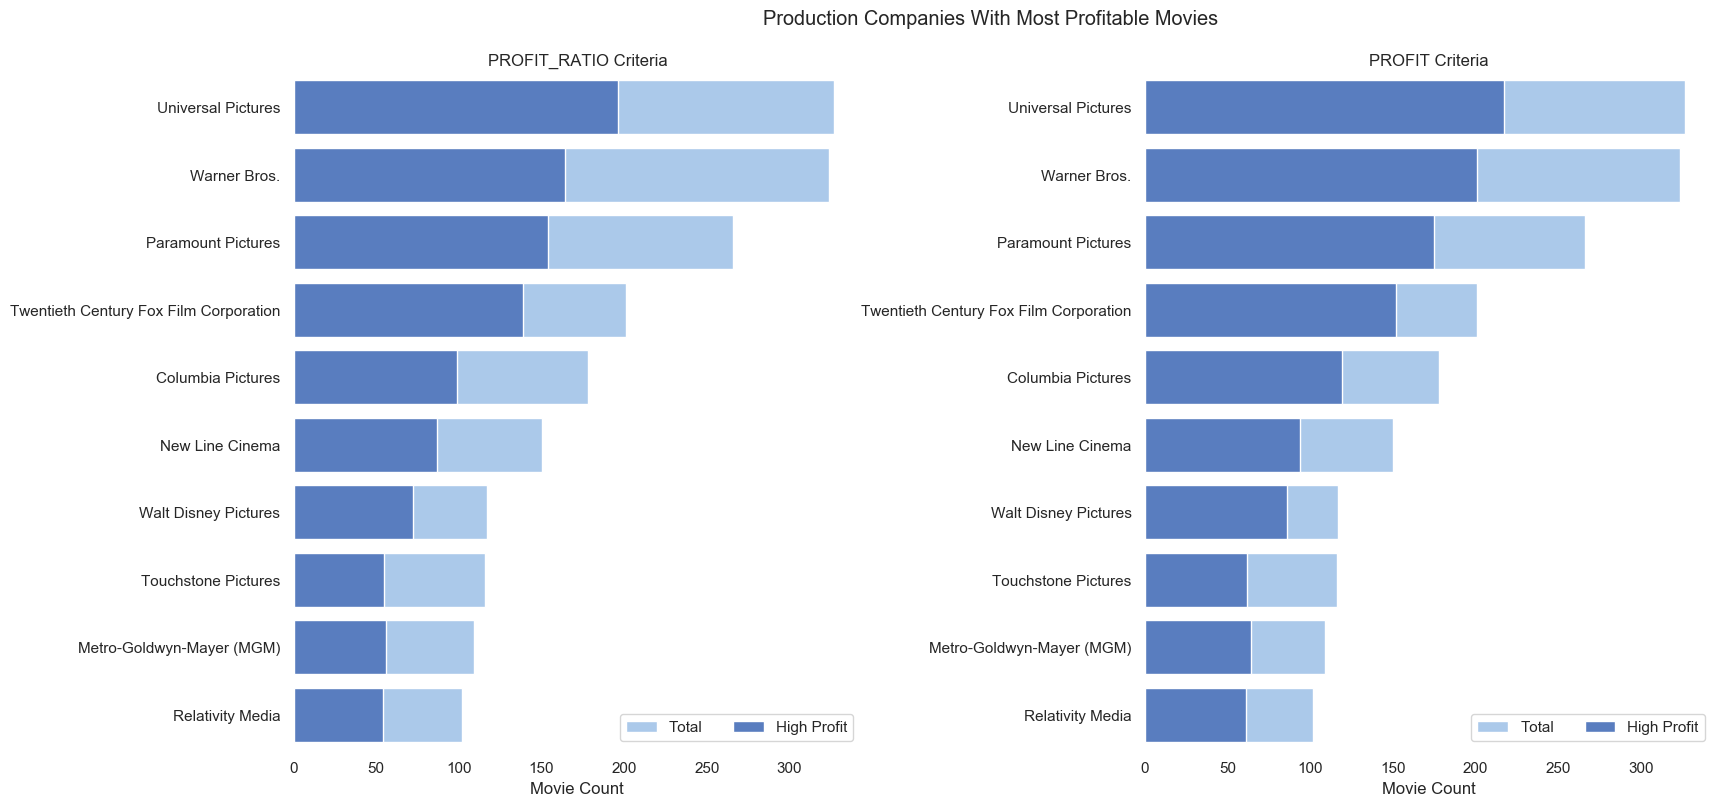

In [74]:
fig, axes = get_figure(1,2,8,15,'Production Companies With Most Profitable Movies',0.5,0.4)
for ax,category,limit in zip(axes,categories,limits):
    #First get a list of top 10 production companies based on number of movies (independent of profit)
    studios = [x for l in df_fin['production_companies'] for x in l]
    studios_dict = dict(Counter(studios).most_common(10))
    #Store the lists for the totals
    values = list(studios_dict.values())
    labels = list(studios_dict.keys())
    #Iterate through the companies and count the number of films which fall in the upper range of profitability
    values2 = []
    for studio in labels:
        data = df_fin[df_fin['production_companies'].apply(lambda x: studio in x)][category]
        data = data[data > limit]
        values2.append(data.count())
    #Plot the totals
    sns.set_color_codes("pastel")
    sns.barplot(x=values,y=labels, ax = ax,label='Total',color='b');
    #Plot the high earners
    sns.set_color_codes("muted")
    sns.barplot(x=values2,y=labels, ax = ax,label='High Profit',color='b');
    #Remove unneeded data
    sns.despine(fig,ax=ax,bottom=True,left=True)
    ax.set(title = (category.upper()+" Criteria"), xlabel = 'Movie Count')
    ax.legend(ncol=2, loc='lower right')

###### Trivia

Universal Pictures, was founded more than 100 years ago, in April of 1912. It's highest earning picture is ET and amongst it's portfolio we can also find such titles as: Gladiator, Scarface or Jurassic Park. 

### Keywords

The most common keywords characterizing profitable movies will be represented using wordclouds. 

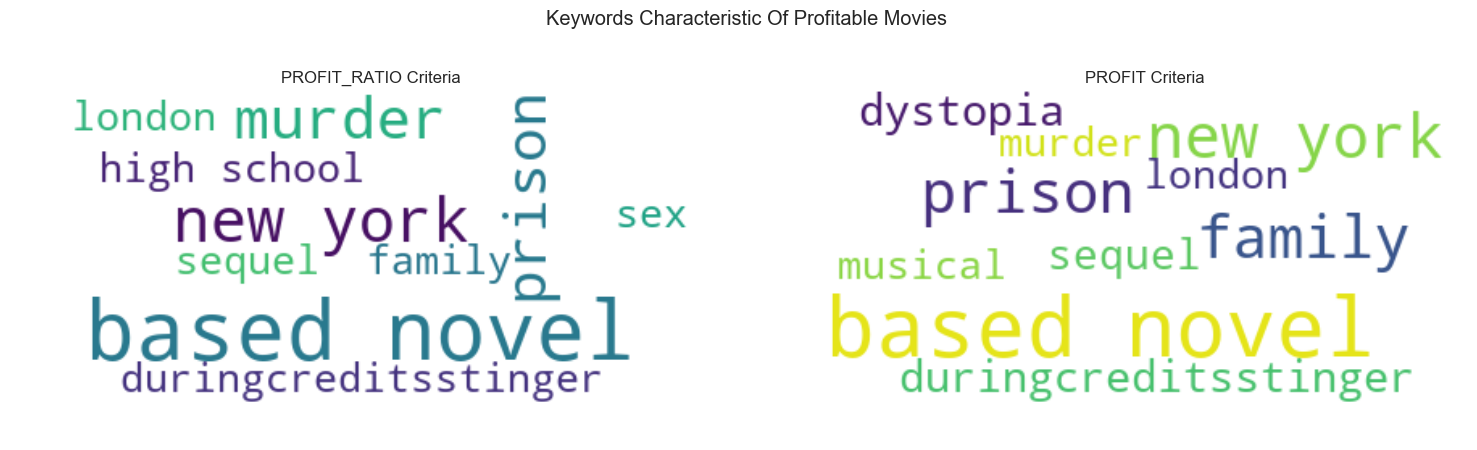

In [75]:
fig, axes = get_figure(1,2,5,15,'Keywords Characteristic Of Profitable Movies',0.2,0.1)
for ax,category,limit in zip(axes,categories,limits):
    #Flatten the list
    keywords = [x for l in df_fin[df_fin[category]>limit]['keywords'] for x in l]
    #Remove placeholders for null values
    keywords = list(filter(lambda a: a!='None',keywords))
    #Create the text which will be the input of the wordcloud and plot without the axis
    text = ' '.join(keywords)
    wordcloud = WordCloud(max_words=10, background_color='white', colormap='viridis').generate(text)
    ax.imshow(wordcloud,interpolation='bilinear')
    ax.set(title = (category.upper()+" Criteria"))
    ax.axis('off')

### Actors

To get a list of common actors starring in profitable movies we will employ a similar logic to the production companies. We will display both the total number of movies and the ones falling the upper range of profitability. In this manner we can see if the chart is not biased due to the actor playing in a larger number of movies.

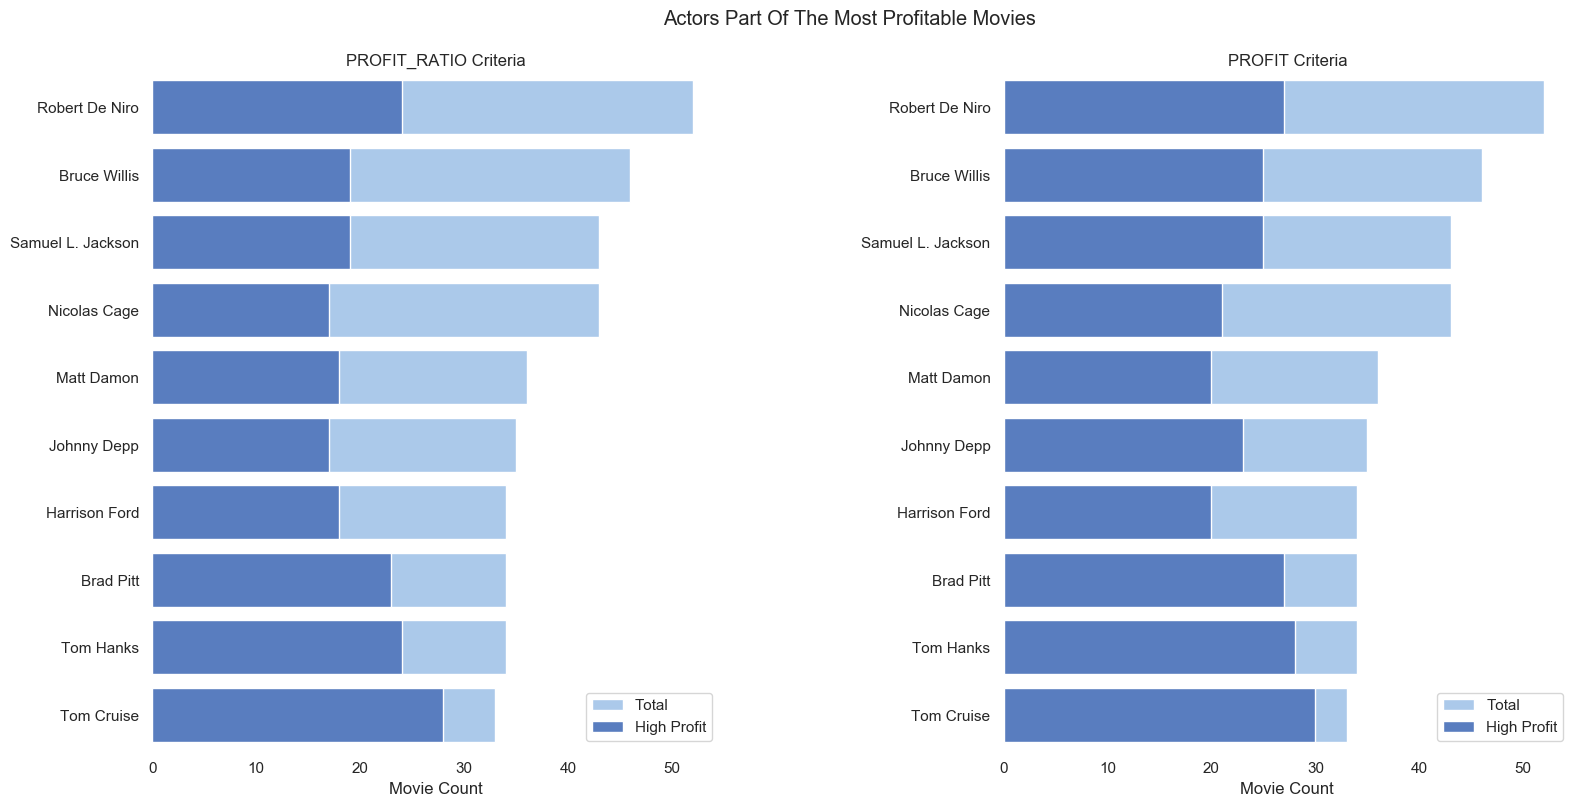

In [76]:
fig, axes = get_figure(1,2,8,15,'Actors Part Of The Most Profitable Movies',0.5,0.4)
for ax,category,limit in zip(axes,categories,limits):  
    keys, values = get_top_list(df_fin,'cast',10)
    values2 = []
    for actor in keys:
        data = df_fin[df_fin['cast'].apply(lambda x: actor in x)][category]
        data = data[data > limit]
        values2.append(data.count())
    sns.set_color_codes("pastel")
    sns.barplot(x=values,y=keys, ax = ax,label='Total',color='b');
    sns.set_color_codes("muted")
    sns.barplot(x=values2,y=keys, ax = ax,label='High Profit',color='b');
    sns.despine(fig,ax=ax,bottom=True,left=True)
    ax.set(title = (category.upper()+" Criteria"), xlabel = 'Movie Count')
    ax.legend(ncol=1, loc='lower right')

The results observed are quite interesting through the fact that the actors with less movies actually have a higher proportion of titles in the high profit category. 

To complete the analysis we will add a second graph counting only the later titles and thus eliminate some of the actors with high number of films but low proportion of profitable ones. 

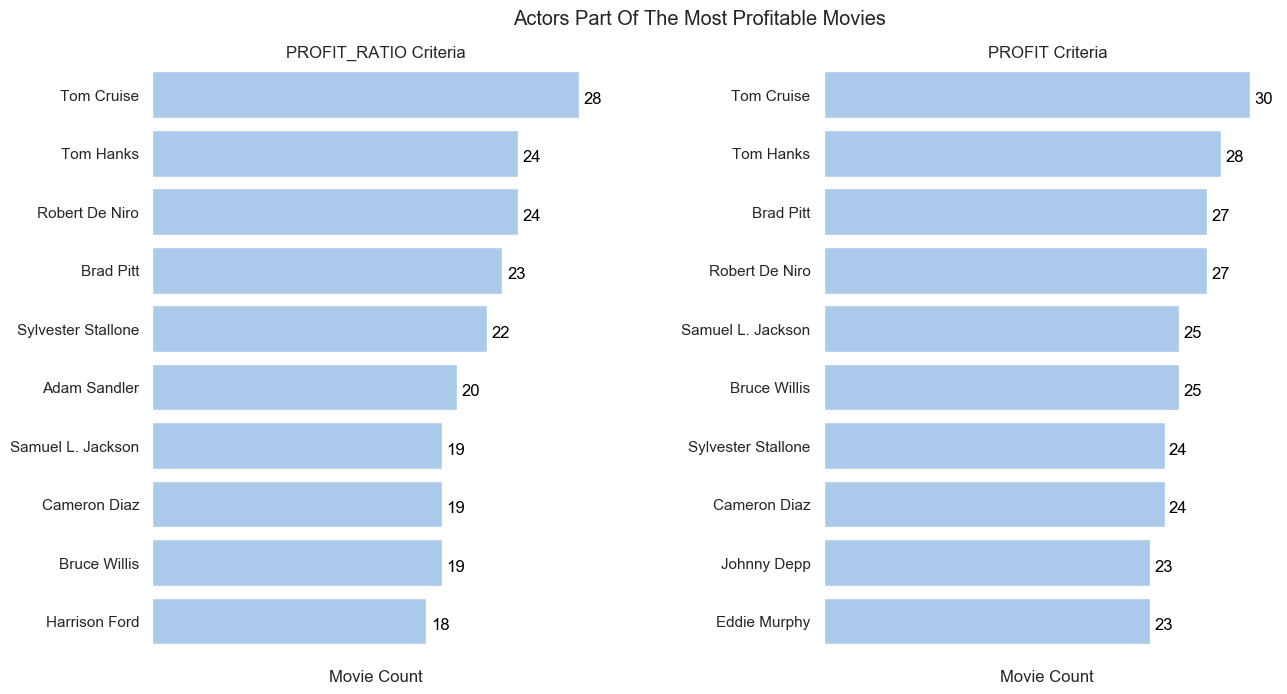

In [77]:
fig, axes = get_figure(1,2,7,12,'Actors Part Of The Most Profitable Movies',0.5,0.4)
for ax,category,limit in zip(axes,categories,limits):
    df_temp = df_fin[df_fin[category]>limit]
    keys, values = get_top_list(df_temp,'cast',10)  
    for i,v in enumerate(values):
        ax.text(v+0.3, i+.15, str(v), color='black')
    sns.set_color_codes("pastel")
    sns.barplot(x=values,y=keys, ax = ax,color='b');
    sns.despine(fig,ax=ax,bottom=True,left=True)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.set(title = (category.upper()+" Criteria"), xlabel = 'Movie Count')

As it can be observed the composition of the chart changes and names like Matt Damon and Nicholas Cage drop out and are replaced by Sylvester Stallone or Samuel L. Jackson, who have less overall titles but a higher number of them falling the upper range of profitability.  

### Time Periods

The final step is to look at the evolution of the budgets and revenues over the years. This will be split into two graphs: a barchart for the aggregated values of each decade and a trendline to see all the timeline continuously. 

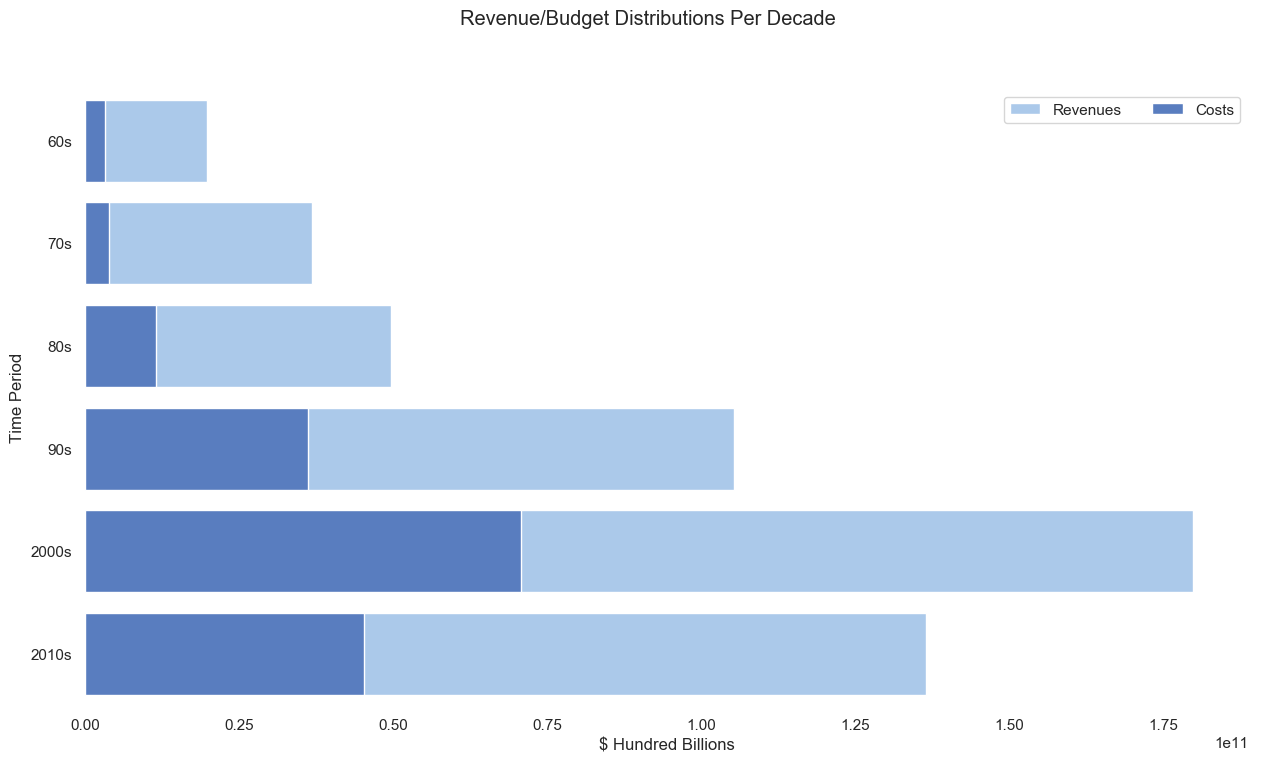

In [78]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Revenue/Budget Distributions Per Decade')
#First get a list of top 10 production companies based on number of movies (independent of profit)
data = df_fin[['time_period','revenue_adj','budget_adj']].groupby('time_period').sum()
labels = bin_names
values = data['revenue_adj']
values2 = data['budget_adj']
sns.set_color_codes("pastel")
sns.barplot(x=values,y=labels, label='Revenues',color='b');
sns.set_color_codes("muted")
sns.barplot(x=values2,y=labels, label='Costs',color='b');
sns.despine(fig,bottom=True,left=True)
ax.set(xlabel = '$ Hundred Billions')
ax.set(ylabel = 'Time Period')
ax.legend(ncol=2, loc='upper right');

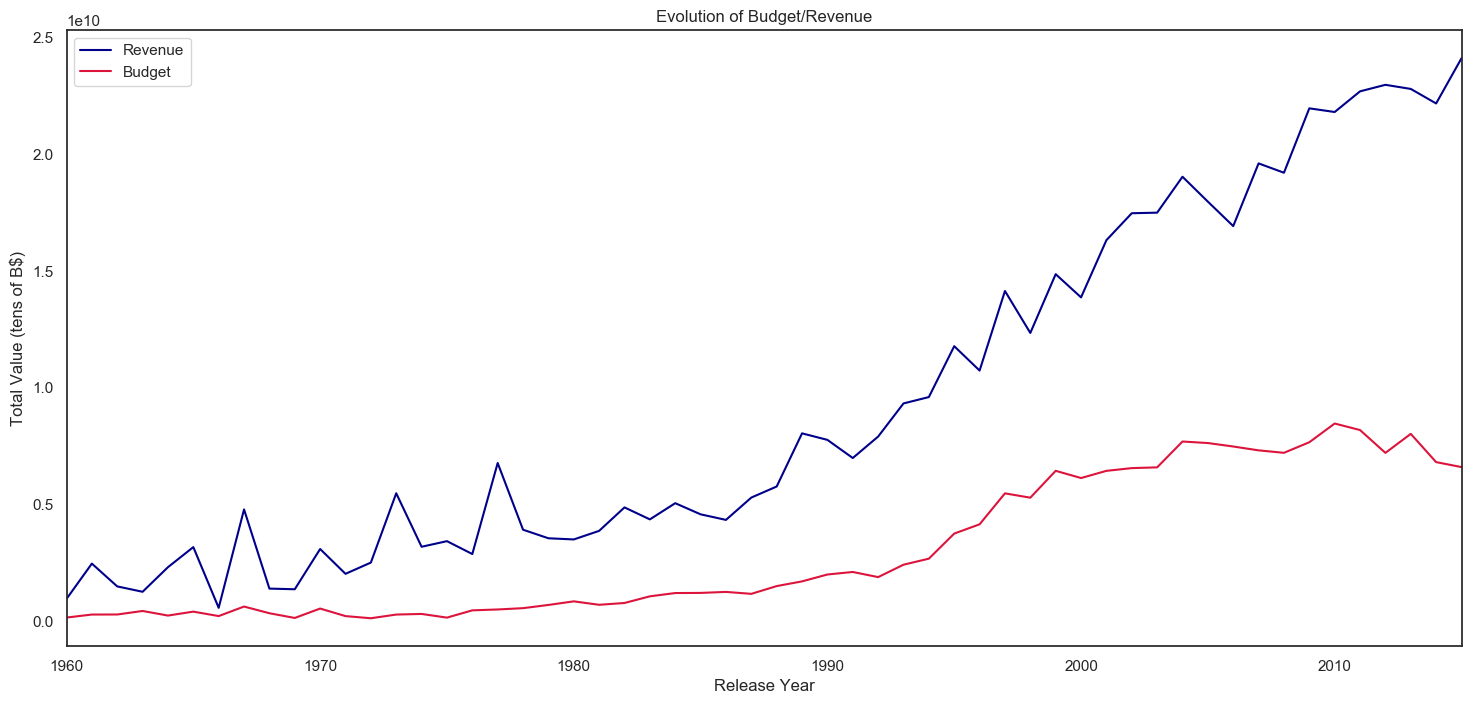

In [79]:
ax1 = df_fin[['release_year','revenue_adj']].groupby('release_year').sum().plot(color='darkblue',label='Revenue',figsize=(18,8),title='Evolution of Budget/Revenue')
df_fin[['release_year','budget_adj']].groupby('release_year').sum().plot(color='crimson',label='Budget',ax=ax1)
ax1.legend(labels=['Revenue','Budget'])
plt.xlabel('Release Year')
plt.ylabel('Total Value (tens of B$)');

<a id='conclusions'></a>
## Conclusions

Over the course of this analysis we have looked at charting a top of movies based on two criterias of success: user ratings and earnings. 

By cross referencing the results we can see that most oftenly success in one category does not imply the same result with the other.  

Some of the success stories that appear in the charts independent of the criteria choosen are: the Lord of the Rings series, Forrest Gump or the Godfather. 

The same conclusions can be drawn from the comparison of actors.

Focusing specifically on the profits, we have noticed a distinction between high profit ratios and high earnings. 
The charts for profit ratios are dominated mostly by independent low budget movies (frequently horrors or comedies). 
In terms of absolute amounts the titles forming the top 10 are different, with blockbuster movies whose earnings go beyond the 500 million USD mark. 

Breaking down the profitable movies we noticed that on average dramas and comedies are high earners. 
In terms of the characteristics of the films, the titles based on novels, dystopian movies or prison stories are amongst the most frequent ones with high returns. 
When it comes to actors there no surprises: Tom Cruise, Tom Hanks or Brad Pitt seem to guarantee a good outcome in terms of boxoffice returns. 

Finally, analysing the time periods, as expected more recent decades record higher profits as the industry grows and ticket prices rise. This is enforced by the trendline that shows a steadier growth in terms of budgets after 2000 with a more steep rise in revenues. 

### Limitations

The financial data is available to only around 33% of the total number of records. Therefore a strict correlation cannot be established between the rating based charts and the ones built on financial results, as the population is different. 
In an attempt to increase the representativity of the results, certain records have been removed, based on quantitive characteristics such as: number of ratings, number of movies starred in or the revenue. The end results of the charts are influenced by the values set for these variables. Also, in relation to the financial data, it is assumed that all values are provided in USD.    


## References and Notes
The external data related to movies earnings and trivia has been obtained from: 
<ul>
    <li>www.imdb.com</li>
    <li>https://en.wikipedia.org</li>
    <li>www.businessinsider.nl</li>
    <li>www.comingsoon.net</li>
    <li>www.forbes.com</li>
    <li>www.unbelievable-facts.com</li>
    <li>www.ifc.com</li>
</ul>

The information required for the python code was obtained from: 
<ul>
    <li>https://stackoverflow.com</li>
    <li>https://seaborn.pydata.org</li>
    <li>https://medium.com</li>
    <li>https://pandas.pydata.org</li>
    <li>https://matplotlib.org</li>
    <li>https://python-graph-gallery.com</li>
    <li>https://www.datacamp.com</li>
</ul>

Assumptions with regards to used data: 
<ul>
    <li>all budget and earnings data is expressed in US dollars</li>
    <li>the earnings are world wide</li>
    <li>the amounts have been correctly adjusted based on inflation</li>
</ul>